In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import subprocess # to run simulation
import re # grep in string

In [2]:
"""de"""
#label_thr = "Durchsatz"
#label_read = "lesen"
#label_write = "schreiben"
#label_combined = "kombiniert"
"""en"""
label_thr = "Throughput"
label_read = "read"
label_write = "write"
label_combined = "combined"

# PLOTS

In [3]:
plt.rcParams['figure.figsize'] = [3, 3]
pos = [1, 2, 4, 8, 16]

In [4]:
def getThroughput(arg1, arg2, arg3, arg4, arg5):
    arg1 = str(arg1) # SCS, CCS, SCRA, CCRA
    arg2 = str(arg2) # R, W, RW
    arg3 = str(arg3) # burstlegth
    arg4 = str(arg4) # transactions per CPU
    arg5 = str(arg5) # chunk size
    program = "/home/khamo/hbm-accelerator/release/butterfly8x8"
    stdout = subprocess.run([program, arg1, arg2, arg3, arg4, arg5], check=True, capture_output=True, text=True).stdout
    line = re.search("Butterfly Total Throughput.*\n", stdout).group()
    value = re.search("[+-]?\d+\.\d+", line).group()
    return float(value)

In [5]:
def executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize):
    runs = int(runs)
    benchmark = str(benchmark)
    transactionsPerCPU = int(transactionsPerCPU)
    chunkSize = int(chunkSize)
    
    rd = np.zeros(5)
    wr = np.zeros(5)
    rw = np.zeros(5)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            rd[index] += getThroughput(benchmark, "R", i, transactionsPerCPU, chunkSize)
        rd[index] /= runs
        index = index + 1
    print("R: ", rd)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            wr[index] += getThroughput(benchmark, "W", i, transactionsPerCPU, chunkSize)
        wr[index] /= runs
        index = index + 1
    print("W: ", wr)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            rw[index] += getThroughput(benchmark, "RW", i, transactionsPerCPU, chunkSize)
        rw[index] /= runs
        index = index + 1
    print("RW: ", rw)
    return (rd, wr, rw)

## SCS for 1000 transactions per Initiator (32)

R:  [4.76 9.5  9.53 9.55 9.56]
W:  [4.77 9.52 9.55 9.56 9.56]
RW:  [ 6.32 12.06 12.46 12.15 12.24]


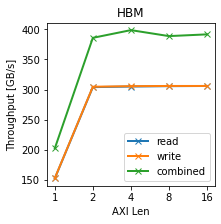

HBM
len   1 r 152.3 w 152.6 rw 202.2
len   2 r 304.0 w 304.6 rw 385.9
len   4 r 305.0 w 305.6 rw 398.7
len   8 r 305.6 w 305.9 rw 388.8
len  16 r 305.9 w 305.9 rw 391.7


In [6]:
benchmark = "SCS"
transactionsPerCPU = 1000
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

rd *= 32
wr *= 32
rw *= 32

fig,ax = plt.subplots()
ax.set_xscale('log', base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/scs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## CCS for 1000 transactions per Initiator (32)

R:  [4.8 9.6 9.6 9.6 9.6]
W:  [4.8  9.57 9.6  9.6  9.6 ]
RW:  [ 5.14 11.65 11.29 11.08 11.59]


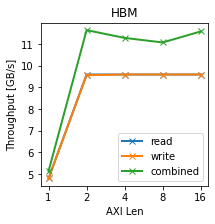

HBM
len   1 r  4.8 w  4.8 rw  5.1
len   2 r  9.6 w  9.6 rw 11.7
len   4 r  9.6 w  9.6 rw 11.3
len   8 r  9.6 w  9.6 rw 11.1
len  16 r  9.6 w  9.6 rw 11.6


In [7]:
benchmark = "CCS"
transactionsPerCPU = 1000
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

fig,ax = plt.subplots()
ax.set_xscale('log', base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/ccs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## SCRA for 1000 transactions per Initiator (32) | 20 runs

R:  [4.76   9.5005 9.539  9.5505 9.5615]
W:  [4.77   9.369  9.5135 9.545  9.561 ]
RW:  [ 5.399   8.9765 10.3725 10.5925 10.744 ]


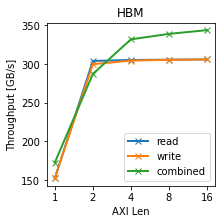

HBM
len   1 r 152.3 w 152.6 rw 172.8
len   2 r 304.0 w 299.8 rw 287.2
len   4 r 305.2 w 304.4 rw 331.9
len   8 r 305.6 w 305.4 rw 339.0
len  16 r 306.0 w 306.0 rw 343.8


In [8]:
benchmark = "SCRA"
transactionsPerCPU = 1000
chunkSize = 32
runs = 20

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

rd *= 32
wr *= 32
rw *= 32

fig,ax = plt.subplots()
ax.set_xscale('log', base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/scra.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## CCRA for 1000 transactions per Initiator (32) | 20 runs

R:  [142.412 249.372 248.775 251.722 250.122]
W:  [142.718 256.622 258.865 259.963 259.709]
RW:  [146.028 212.158 249.088 269.406 274.367]


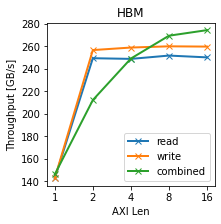

HBM
len   1 r 142.4 w 142.7 rw 146.0
len   2 r 249.4 w 256.6 rw 212.2
len   4 r 248.8 w 258.9 rw 249.1
len   8 r 251.7 w 260.0 rw 269.4
len  16 r 250.1 w 259.7 rw 274.4


In [9]:
benchmark = "CCRA"
transactionsPerCPU = 1000
chunkSize = 32
runs = 10

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

#rd = np.array([52.423 67.502 73.044 73.172 73.346])
#wr = np.array([52.341 69.844 72.931 74.104 75.056])
#rw = np.array([110.684 134.979 142.067 146.832 144.958])

fig,ax = plt.subplots()
ax.set_xscale('log', base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/ccs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))